#The Real Story of Produce Prices: Exploring the Relationship Between Farmers and Your Grocer

This is an exploratory data analysis on the 'produce price index' dataset. The information contained within the dataset comes from four major cities (Atlanta, Chicago, Los Angeles, and New York) from 1999 to 2019.

The other columns included in the datasest are:

*   Product Name - The name of the product, examples provided below.
*   Date - The date when the pricing information was obtained.
*   Farm Price - The price the retail product sells for at the farm.
*   Average Spread - Percentage indicating markup from farm price to retail price.

The dataset includes 22 diverse products such as broccoli crowns, carrots, and Thompson grapes.

The dataset was obtained from Kaggle, or can be obtained directly from the source at http://www.producepriceindex.com .

<h2>Installing Libraries, Loading the Dataset and Initial Exploration</h2>

Steps Taken in Initial Exploration

*   Viewed both the top and bottom of the dataset using .head() and .tail()
*   Obtained metadata using .info()
*   Searched for missing and duplicate values using .isnull() and .duplicated()

In [4]:
#To import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter

In [5]:
#To load the dataset
df = pd.read_csv("ProducePriceIndex.csv", header=0)

In [6]:
#To print out the first 5 lines of the dataset
df.head()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
0,Strawberries,2019-05-19,$1.16,$2.23,$1.70,$1.99,$2.54,82.33%
1,Romaine Lettuce,2019-05-19,$0.35,$1.72,$2.00,$1.69,$1.99,428.57%
2,Red Leaf Lettuce,2019-05-19,$0.32,$1.84,$1.84,$1.69,$1.89,467.19%
3,Potatoes,2019-05-19,$1.50,$5.32,$5.14,$3.99,$6.22,244.50%
4,Oranges,2019-05-19,$0.41,$1.42,$1.45,$1.34,$2.05,281.71%


In [7]:
#To print out the last 5 lines of the dataset
df.tail()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
15761,Broccoli Crowns,1999-10-24,$0.29,$1.46,$0.00,$0.97,$1.15,208.62%
15762,Broccoli Bunches,1999-10-24,$0.23,$1.21,$0.00,$0.84,$1.10,242.39%
15763,Cauliflower,1999-10-24,$0.19,$1.01,$0.00,$0.75,$0.92,252.63%
15764,Carrots,1999-10-24,$0.12,$0.64,$0.00,$0.84,$0.59,331.25%
15765,Cantaloupe,1999-10-24,$0.21,$0.54,$0.00,$0.56,$0.79,125.00%


In [8]:
# @title
#To examine dataset statistics
df.describe()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
count,15766,15766,15766,15766,15766,15766,15766,15766
unique,22,1019,316,528,458,436,406,10492
top,Broccoli Crowns,2012-08-12,$0.21,$1.32,$0.00,$0.99,$1.99,250.00%
freq,1017,37,408,243,1103,475,547,37


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15766 entries, 0 to 15765
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   productname       15766 non-null  object
 1   date              15766 non-null  object
 2   farmprice         15766 non-null  object
 3   atlantaretail     15766 non-null  object
 4   chicagoretail     15766 non-null  object
 5   losangelesretail  15766 non-null  object
 6   newyorkretail     15766 non-null  object
 7   averagespread     15766 non-null  object
dtypes: object(8)
memory usage: 985.5+ KB


In [10]:
#To sum the number of null values in the dataframe.
df.isnull().sum()

productname         0
date                0
farmprice           0
atlantaretail       0
chicagoretail       0
losangelesretail    0
newyorkretail       0
averagespread       0
dtype: int64

In [11]:
#To sum the number of duplicated values in the dataframe.
df.duplicated().sum()

51

<h6>Summary of Initial Exploration</h6>

* Chicago retail has many '0.00' values visible when calling df.tail().

* With 1019 unique date values between 1999 and 2019, that equates to approximately one price update per week.

* Every column in the dataset is an object, which means numeric columns will need to be converted to datetime and float in order to work with them.

* There are 51 duplicated rows which is less than a third of 1 percent of the dataset.

<h2>Data Cleaning</h2>

Steps Taken in the Data Cleaning Process
1. Renamed the columns for readability.
<br>
2. Converted the 'currency' strings to floats and removed the dollar sign.
3. Converted the 'average spread' strings to floats and removing the percent sign.
<br>(Each of the above operations were done to convert the numbers into a workable form to be used for calculations.)
<br>
4. Checked for missing values and duplicates.
5. Removed missing values and duplicates. <br>
(Each of the above were performed to ensure data integrity, as missing values and duplicates can skew the results.)
<br>
6. Imputed average 'retail prices' over inputs of '0.00' in retail columns. <br>
    (The decision to impute will be covered in greater detail at the end of this section.)

In [12]:
#To rename the columns for readability.
df.rename(columns = {'atlantaretail': 'Atlanta Retail', 'chicagoretail': 'Chicago Retail','losangelesretail': 'Los Angeles Retail', 'newyorkretail': 'New York Retail', 'farmprice': 'Farm Price', 'averagespread': 'Average Spread','date': 'Date'}, inplace=True)

In [13]:
#To assign all columns containing currency to the variable 'currency'.
currency = ['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'New York Retail', 'Farm Price']

In [14]:
#To indicate the columns assigned to the variable 'cities' are the 'columnsWithCurrency'
columnsWithCurrency = currency
#To convert currency columns to floats by removing the dollar sign.
for col in columnsWithCurrency:
  df[col]=pd.to_numeric (df[col].replace('[\$,]', '', regex=True), errors='coerce')
# To convert percentage string to numeric, remove the percent sign.
df['Average Spread'] = pd.to_numeric(df['Average Spread'].replace('[\%,]','', regex=True), errors='coerce')
#To convert date column to datetime.
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
#To define the names of city (retail price) columns.
cities = ['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'New York Retail']
zeroDollarProducts = 0
#To iterate through each city counting zero '0.00' values.
for city in cities:
    count = (df[city] == 0.00).sum()
    print(f'$0.00 values in {city} = {count}')
    zeroDollarProducts += count

print(f'$0.00 values dataset wide: {zeroDollarProducts}')

$0.00 values in Atlanta Retail = 193
$0.00 values in Chicago Retail = 1103
$0.00 values in Los Angeles Retail = 84
$0.00 values in New York Retail = 332
$0.00 values dataset wide: 1712


In [16]:
#To define missing and zero values.
precondition = (df[cities] == 0.00) | (df[cities].isnull())
# To calculate the average price of the 'cities' columns and round to two decimal places.
avgPrice = df[cities].mean(axis=1).round(2)
#To impute averages in place of missing or defined '0.00' values.
for column in cities:
    df.loc[precondition[column], column] = avgPrice
# To print the dataset to ensure a successful imputation.
for column in cities:
    print(f"New (imputed) values for {column}:")
    print(df.loc[precondition[column], column])

New (imputed) values for Atlanta Retail:
2469     1.88
2772     0.91
2805     0.93
2819     1.67
2821     1.64
         ... 
12907    1.03
12909    0.85
12913    1.03
14201    0.47
14664    0.90
Name: Atlanta Retail, Length: 194, dtype: float64
New (imputed) values for Chicago Retail:
3602     0.41
3603     0.56
3608     0.50
3609     0.81
3611     0.46
         ... 
15761    0.89
15762    0.79
15763    0.67
15764    0.52
15765    0.47
Name: Chicago Retail, Length: 1103, dtype: float64
New (imputed) values for Los Angeles Retail:
2521     0.74
3601     1.01
3602     0.41
3603     0.56
3607     1.26
         ... 
12849    1.29
12851    1.32
13198    0.23
13233    3.25
14176    0.25
Name: Los Angeles Retail, Length: 84, dtype: float64
New (imputed) values for New York Retail:
107      1.93
234      2.01
262      1.50
315      2.02
331      3.73
         ... 
14477    2.36
14664    0.90
14743    2.15
14879    0.66
15401    0.55
Name: New York Retail, Length: 340, dtype: float64


In [17]:
#To drop the duplicates in the dataframe.
df.drop_duplicates()

,productname,Date,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,New York Retail,Average Spread
0,Strawberries,2019-05-19,1.16,2.23,1.70,1.99,2.54,82.33
1,Romaine Lettuce,2019-05-19,0.35,1.72,2.00,1.69,1.99,428.57
2,Red Leaf Lettuce,2019-05-19,0.32,1.84,1.84,1.69,1.89,467.19
3,Potatoes,2019-05-19,1.50,5.32,5.14,3.99,6.22,244.50
4,Oranges,2019-05-19,0.41,1.42,1.45,1.34,2.05,281.71
...,...,...,...,...,...,...,...,...
15761,Broccoli Crowns,1999-10-24,0.29,1.46,0.89,0.97,1.15,208.62
15762,Broccoli Bunches,1999-10-24,0.23,1.21,0.79,0.84,1.10,242.39
15763,Cauliflower,1999-10-24,0.19,1.01,0.67,0.75,0.92,252.63
15764,Carrots,1999-10-24,0.12,0.64,0.52,0.84,0.59,331.25


In [18]:
#To remove rows containing null values.
df.dropna(inplace=True)

<h6> Imputing the Mean </h6>
The decision was made to impute the mean based on prices being unavailable for Chicago from the start of the dataset in 1999 until early 2001. In addition, other retail price columns also had inputs of '0.00'. Dropping all rows containing this value would have taken away more than 10% of the dataset, which could make a pretty significant impact. Imputing the mean (average) ensures that we are still able to take advantage of the rest of the data in those columns.

<h2>Handling Outliers</h2>

<h6>Steps Taken to Handle Outliers:</h6>
1. Identified outliers
<br>
2. Determined best course of action for handling them.

In order to visualize outliers, a box plot representing each of the five price columns is used.

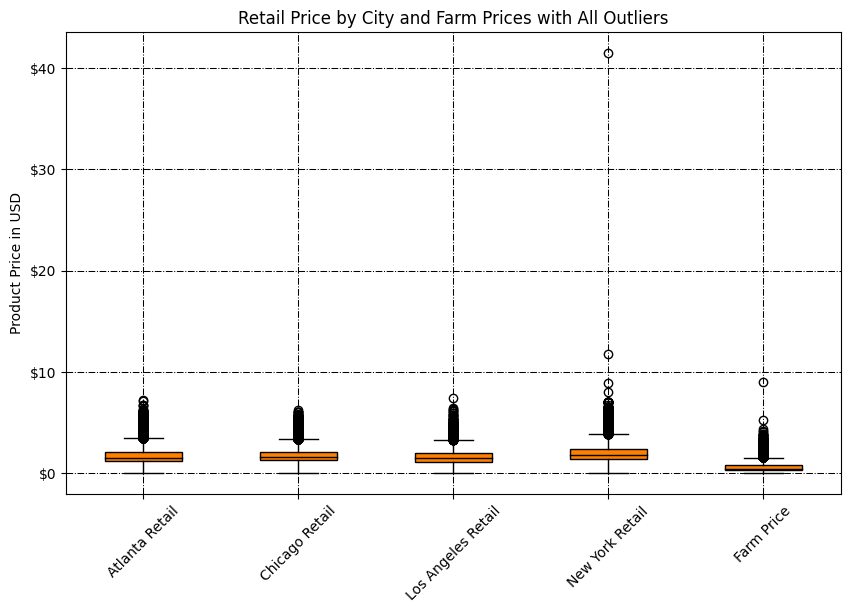

In [19]:
#To create a function to generate box plots.
def generateBoxPlot(data, labels, title, ylabel, figsize=(10, 6), rotation=45, grid=True):
    plt.figure(figsize=figsize)
    #To create the boxplot, enhance visualization and color in the box representing the IQR.
    plt.boxplot(data, labels=labels,boxprops=dict(facecolor = '#FF7F00', color='black'), medianprops={'color': 'black'}, patch_artist=True)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.gca().yaxis.set_major_formatter('${:.0f}'.format)
    plt.grid(True, color='black', linestyle='-.', linewidth=0.75)
#To plot the distribution of price over select columns, generate a title and prices.
prices = df[['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'New York Retail', 'Farm Price']]
generateBoxPlot([prices[col] for col in prices.columns], prices.columns, 'Retail Price by City and Farm Prices with All Outliers', 'Product Price in USD')

Through visual examination the following outliers can be spotted:

1. An outlier of roughly forty dollars in New York
2. An outlier of over ten dollars, also in New York

While the ten dollar outlier could be a true price, especially considering the farm price outlier just below ten dollars, it's more likely that the forty dollar outlier is a typo. For the sake of analysis it will be assumed to be a typo and therefore will be removed. The next step is to search for and drop the row with the forty dollar outlier. Then, check to ensure the outlier has been dropped.

Note: Because of the number of rows in the dataframe, it makes sense to drop the outlier. If there were many outliers, or few rows, it might make sense to do some sort of imputation. We'll see more of that later.

In [20]:
#To find the max value contained in the 'New York Retail' column.
maxValue = df['New York Retail'].max()
# To find the product name of the product with the max value in the 'New York Retail' column
productName = df[df['New York Retail'] == maxValue]['productname']
# To print both the maximum value and the product name with which it is associated.
print("The max value in 'New York Retail' is:", {maxValue}, "and this is the price for:", productName.values)

The max value in 'New York Retail' is: {41.49} and this is the price for: ['Red Leaf Lettuce']


In [21]:
# To assign the values of outliers found above to a variable.
outliers = [41.49]
# To filter out the rows that are equal to the outlier $41.49.
df1 = df[~df['New York Retail'].isin(outliers)]
#To check the shape of the revised dataframe against the shape of the original dataframe.
print("Shape of original DataFrame:", df.shape)
print("Shape of revised DataFrame:", df1.shape)

Shape of original DataFrame: (15765, 8)
Shape of revised DataFrame: (15764, 8)


In [22]:
# @title
#dropped_row = df.loc[df['Average Spread'].idxmax()]
#df=df.drop(dropped_row.name)
#print(f"Dropped data point - Product: {dropped_row['productname']}, Average Spread(%): {dropped_row['Average Spread']}")

Once the outliers are removed, it's a better time to take a look at the price by product. Without the forty dollar outlier, a box plot makes it easy to see the pricing variability of the rest of the products.

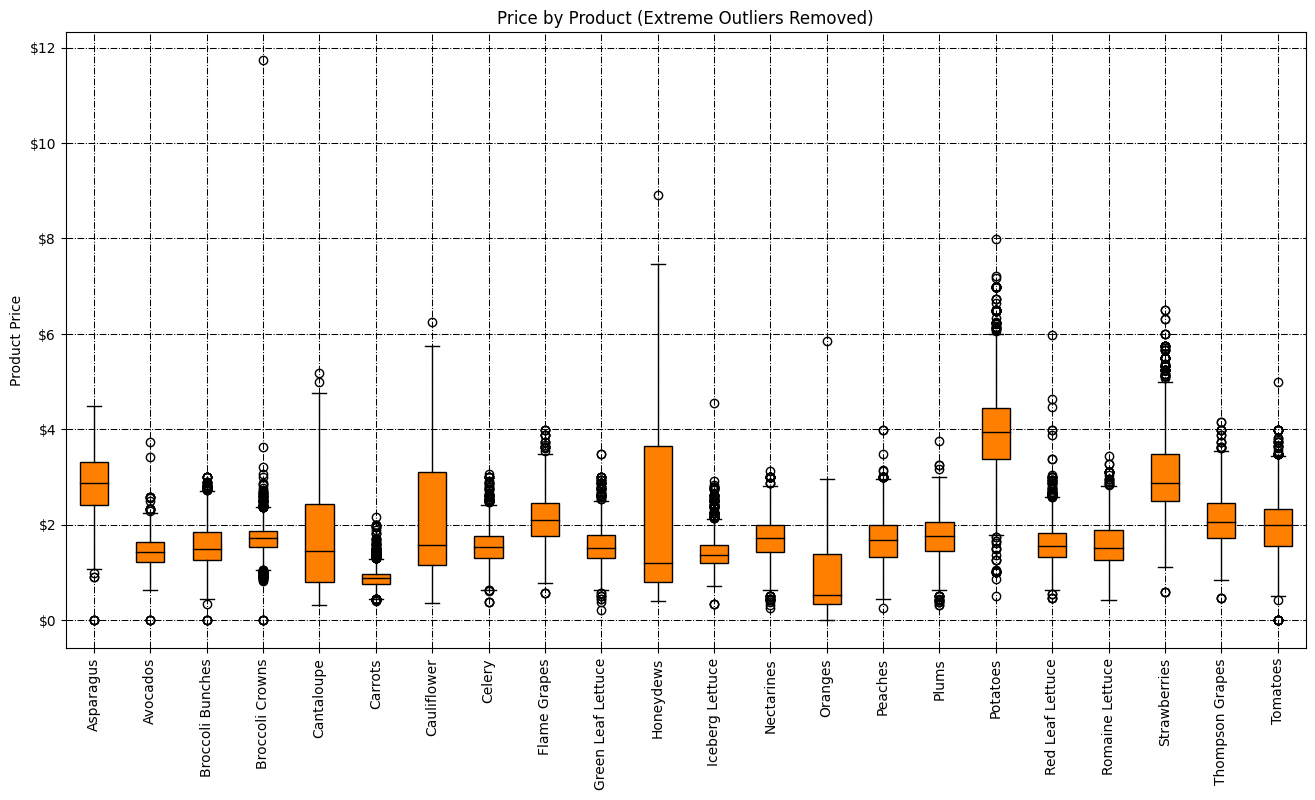

In [23]:
#To change the setup of the dataset.
dfMelt1 = df1.melt(id_vars='productname', value_vars=['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'New York Retail'], var_name='City', value_name='Price')
#To group prices by product names.
groupedList1 = dfMelt1.groupby('productname')['Price'].apply(list)
# To generate the boxplot, assign a title, y-label, figure size, and format of the products.
generateBoxPlot(groupedList1.values, groupedList1.index, 'Price by Product (Extreme Outliers Removed)', 'Product Price', figsize=(16, 8), rotation=90)

From this graph it can be gleaned that produce prices typically fall under two dollars. There are some outliers, such as potatoes, which average around four dollars. There is much greater variability in honeydews than the rest of the products. There is less variability in carrots than the rest of the products.

Handling Outliers Summary:

Detecting the 40 dollar outlier prompted further research, which led to the discovery that the 40 dollar outlier was actually red leaf lettuce. Since there was only one outlier, it was removed. Once the outlier was removed it was much easier to see the price distribution among the various products.

<h2>Data Visualization</h2>

Steps Taken in Data Visualization


1. Constructed correlation matrix
2. Converted 'Date' column to datetime
3. Constructed a bar graph detailing markup by year.
4. Created a function to extract the season from the date.
5. Constructed a bar chart to see the most expensive produce in a given city by season.
6. Constructed side-by-side bar graphs to compare the products with the most markup and the least markup.



By employing the correlation matrix, the relationships between the variables in the data can be examined more closely.

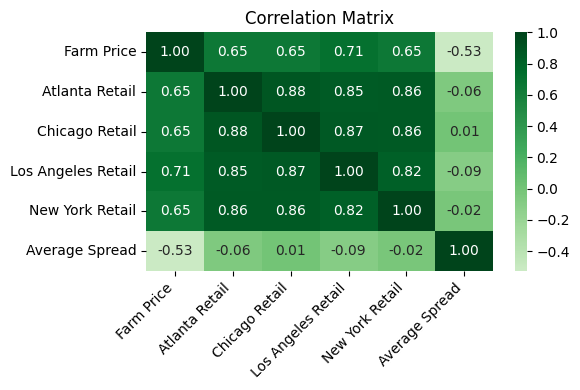

In [24]:
corrMat = df1.corr(numeric_only=True)
#To set the size of the heatmap for maximum readability.
plt.figure(figsize=(6, 4 ))
#To plot heatmap, add data, format data to two decimal places, set a color and center the neutral color on zero.
sns.heatmap(corrMat, annot=True, fmt= ".2f",cmap='Greens', center=0)
plt.xticks(rotation=45, ha='right')
#To display the heatmap
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

The correlation matrix illustrates a strong negative correlation between farm price and average spread.

The correlation matrix also illustrates a strong positive correlation between all of the retail prices, with the strongest correlation between Atlanta and Chicago at 0.88.

Average Spread (markup) also appears to have low or no relationship with all of the Retail prices.

In [25]:
#To convert date column to datetime.
df2 = df1.copy()
#df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['Date'])
#To set the index with the 'date' column.
df2.set_index('date', inplace = True)

A line graph makes it easy to spot patterns and trends in data over time. Analysis of markup could lead to more informed pricing decisions in the future.

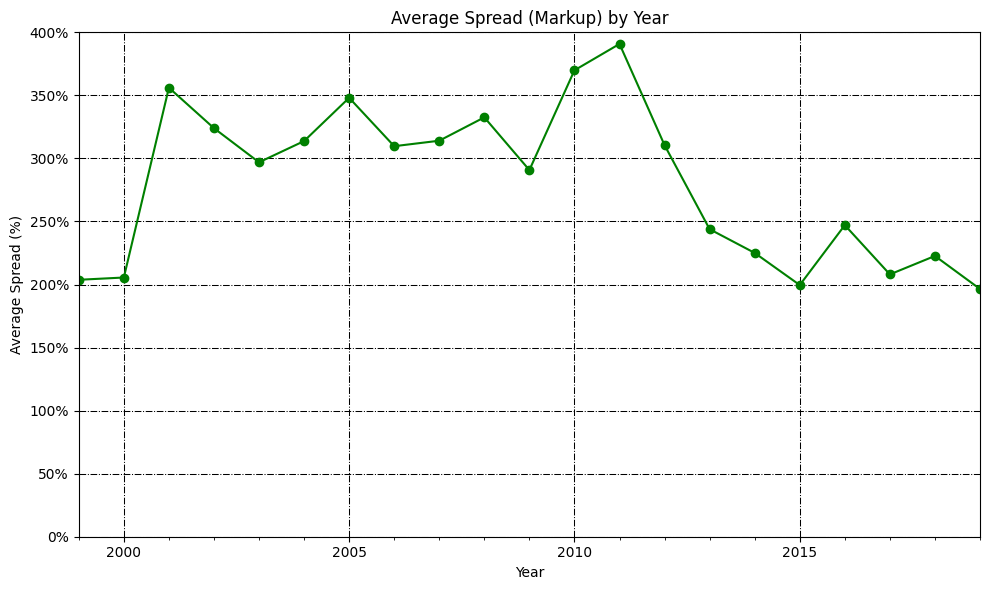

In [26]:
#To resample data by year and calculate the yearly average of 'Average Spread'.
annualSpread = df2['Average Spread'].resample('A').mean()
# To plot the line graph with the index as x-axis and the mean values as y-axis.
plt.figure(figsize=(10, 6))
annualSpread.plot(marker='o', color='green', title='Average Spread (Markup) by Year')
#To label the axes.
plt.xlabel('Year')
plt.ylabel('Average Spread (%)')
#To start the yaxis at 0 and end it at 400.
plt.ylim(0, 400)
#To display gridlines.
#To format the y-axis as a percentage.
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.grid(True, color = 'black', linestyle='-.', linewidth=0.75)
#To display the line graph.
plt.tight_layout()
plt.show()

From the line graph depicting Average Spread by Year, fluctuations can be spotted. Markup started at 200 percent prior to the year 2000. It has been drawing nearer to 200 percent again ever since 2015. Between 2001 and 2013 the average markup remained around 300-350%.

Hypothesis: One of the possible reasons why markup could be falling over time is the anticipation of the implementation of the FDA's Food Traceability Final Rule, which went into effect on November 15, 2022. Although 2022 isn't a part of the dataset, it's possible that individual municipalities were implementing similar rules before the federal rule went into place. The cost to comply with these new rules could be so great that farms lost roughly half of their profits.

In [27]:
#Sometimes it's not enough to simply know the date. Sometimes the season is also relevant but unavailable.
#This function was created to extract the season from the date column by month.
#To create a function to separate months into seasons.
def getSeason(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
# To return the season using the 'getSeason' function.
df2.loc[:, 'Season'] = df2['Date'].apply(getSeason)

Bar graphs make it easy to make comparisons. Therefore, we'll use one to take a look at the most expensive produce in a given city by season, in order to gain insight on seasonality and regionality.

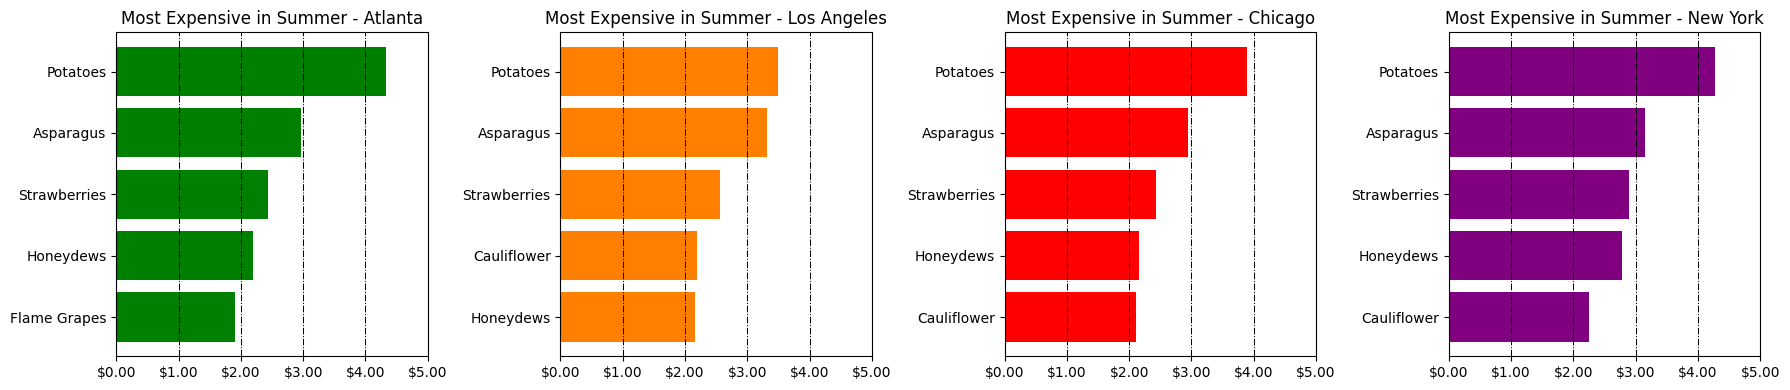

In [30]:
# To select a season from the 'getSeason' function.
selectSeason = 'Summer'
#To filter data by the season selected above.
dataBySeason = df2[df2['Season'] == selectSeason]
#To define retail prices by city and assign color.
cities = ['Atlanta Retail', 'Los Angeles Retail', 'Chicago Retail', 'New York Retail']
colors = ['green', '#FF7F00', 'red', 'purple']
# To configure the plot and give graph its own y-axis.
fig, axes = plt.subplots(1, len(cities), figsize=(18, 4))
#To create a for loop to get the most expensive product by city.
for i, city in enumerate(cities):
    top5 = dataBySeason.groupby('productname')[city].mean().nlargest(5).reset_index()
    #To return the city name by removing the word 'Retail' from the column name.
    cityName = city.replace(' Retail', '')
    #To use the 'barh' function to create horizontal bar charts.
    axes[i].barh(top5['productname'], top5[city], color=colors[i])
    axes[i].set_xlim(0, 5)
    #To create the graph.
    axes[i].set_title(f'Most Expensive in {selectSeason} - {cityName}')
    #To format the x-axis to USD and round to two decimal places.
    axes[i].xaxis.set_major_formatter('${:.2f}'.format)
    #To set all x axes to the same parameters for maximum readability.
    axes[i].grid(True, axis='x', color='black', linestyle='-.', linewidth=0.75)
    axes[i].invert_yaxis()
#To display the bar charts
plt.tight_layout()
plt.show()

The most expensive items in Los Angeles, Chicago, and New York are all the same: honeydews, cauliflower, strawberries, asparagus, and potatoes. Atlanta shares all of those, except for one. Instead of cauliflower Atlanta has flame grapes in its number five spot. Even though these cities have a lot in common, they vary in price. Honeydews are just over two dollars in Los Angeles and Chicago, but are slightly under three dollars in New York City. Potatoes are more expensive than asparagus by at least a dollar in Atlanta and New York, but potatoes and asparagus are much closer in price in Los Angeles.



Lastly, of the 22 item dataset, which five products have the least and most markup on average? To illustrate this a side by side bar graph will be created with equal x-axes for easy comparison.

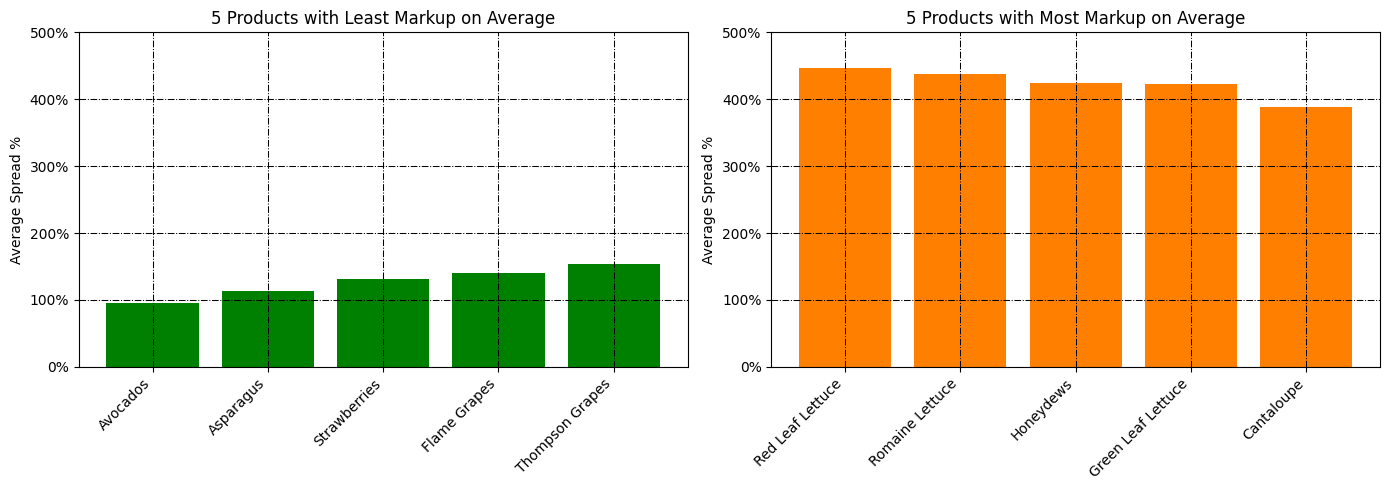

In [29]:
#To define a function that will be used to create bar charts.
def createBarChart(data, title, color, ax):
  ax.bar(data['productname'], data['Average Spread'], color=color)
  ax.set_xticks(range(len(data['productname'])))
  ax.set_xticklabels(data['productname'], rotation=45, ha='right')
  ax.set_title(title)
  ax.set_ylabel ("Average Spread %")
  ax.set_ylim(0,500)
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}%'))
  ax.grid(True, color='black', linestyle = '-.', linewidth=0.75)
# To get an average of 'Average Spread' for each of the 22 products.
df3 = df2.groupby('productname')['Average Spread'].mean().reset_index()
#To select the produce with the most markup, and the produce with the least markup.
productsWithLeastMarkup = df3.nsmallest(5, 'Average Spread')
productsWithMostMarkup = df3.nlargest(5, 'Average Spread')
#To build the visualization and set the size.
fig, axs = plt.subplots(1,2, figsize=(14,5))
#To create both bar charts, assign titles, colors, and axes.
createBarChart(productsWithLeastMarkup, "5 Products with Least Markup on Average", 'green', axs[0])
createBarChart(productsWithMostMarkup, "5 Products with Most Markup on Average", '#FF7F00', axs[1])
#To display the bar charts.
plt.tight_layout()
plt.show()

The products with the least markup on average are falling somewhere between roughly 100% and 150% The products with the most markup are falling somewhere between 350% and 450%.

Apparently avocado toast is expensive, but avocados have the least markup on average, of all of the 22 products included in the dataset.

<h2>Summary</h2>

This analysis was meant to provide a glimpse into the world of 'produce prices' from 1999 to 2019. Here are the key takeaways:

* Prior to 2011 markup on produce hovered between 300 and 350%.
* Prices tend to vary between cities, which points to some pricing factors being tied to geographic location.
* Produce is almost always most expensive in New York.
* Even with a near 50% reduction in markup on produce since 2011, markup still averages around 200%.
* Consumers can use these findings to make more informed purchases, especially with an understanding of how seasonality and regionality impact prices.
* These findings could be employed by retailers to drive informed decisions regarding pricing strategy and promotions.